In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.5.1"

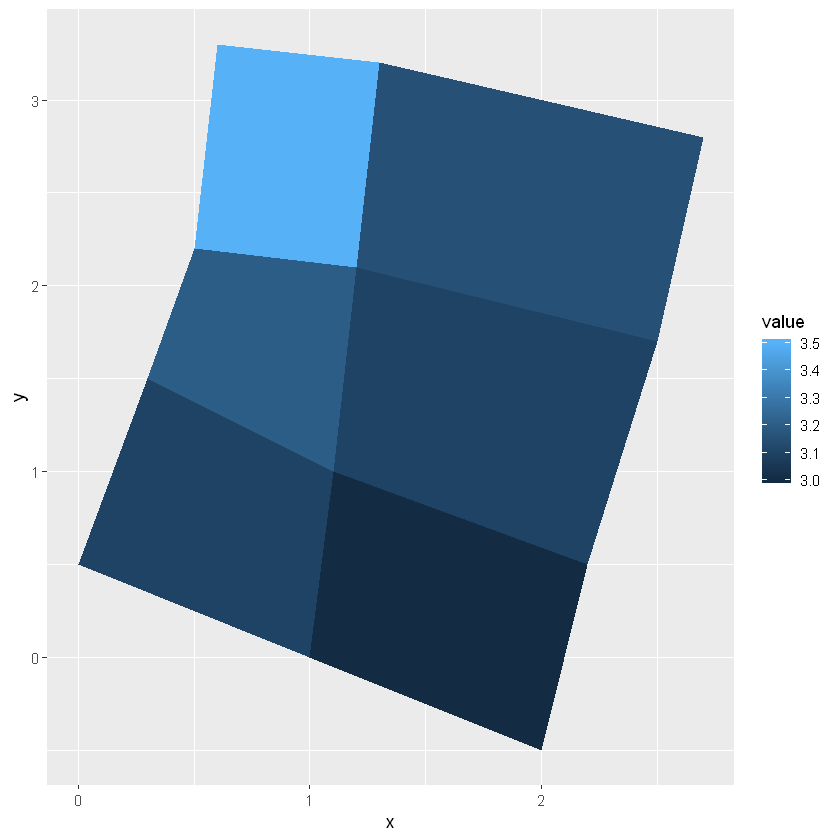

In [2]:
# When using geom_polygon(), you will typically need 2 data
# frames: one contains the coordinates of each polygon (positions),
# and the other the values associated with each polygon (values).
# An id variable links the two together

ids <- factor(c("1.1", "2.1", "1.2", "2.2", "1.3", "2.3"))

values <- data.frame(
  id = ids,
  value = c(3, 3.1, 3.1, 3.2, 3.15, 3.5)
)

positions <- data.frame(
  id = rep(ids, each = 4),
  x = c(2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 
        1.1, 0.3, 0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 
        0.6, 1.3),
  y = c(-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 
        1, 1.5, 2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 
        3.3, 3.2)
)

# Currently, we need to manually merge the 2 together
datapoly <- merge(values, positions, by = c("id"))

p <- ggplot(datapoly, aes(x = x, y = y)) +
  geom_polygon(aes(fill = value, group = id))
p

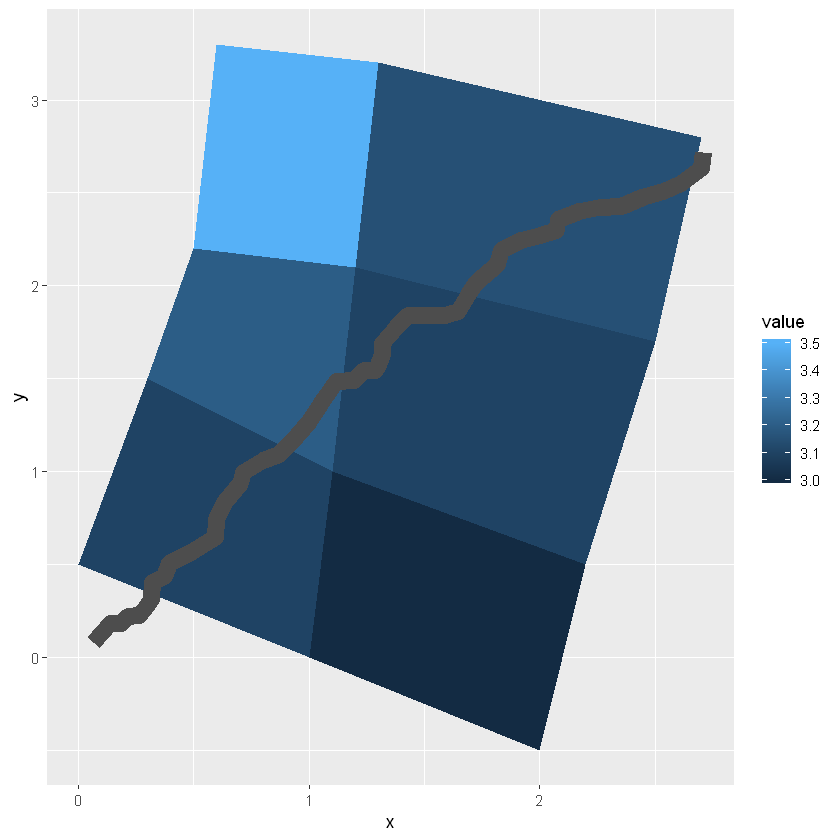

In [3]:
# Which seems like a lot of work, but then it's easy to add on
# other features in this ccordinate system, e.g.

stream <- data.frame(
  x = cumsum(runif(50, max = 0.1)),
  y = cumsum(runif(50, max = 0.1))
)

p + geom_line(data = stream, colour = "grey30", size = 5)

In [4]:
# And if the positions are in longitude and latitude, you can
# use coord_map to produce different map projections.